##Guía 1 Visión

---



Ezequiel Vijande

Lucero Guadalupe Fernandez


###Ejercicio 4

(-0.5, 2.5, 2.5, -0.5)

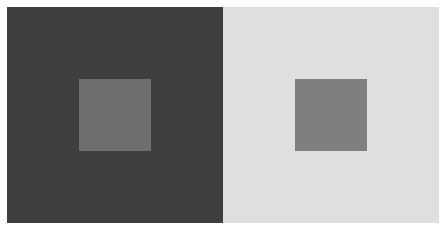

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

center_ = 110
center_l = (center_, center_, center_)
center_r = (127, 127, 127)
dark = (63,63,63)
light = (223,223,223)

img_one = [[dark, dark, dark],
          [dark, center_l, dark],
          [dark, dark, dark]]

img_two = [[light, light, light],
          [light, center_r, light],
          [light, light, light]]

#las ploteamos al lado
f = plt.figure()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
f.add_subplot(1,2, 1)
plt.imshow(img_one)
plt.axis('off')
f.add_subplot(1,2, 2)
plt.imshow(img_two)
plt.axis('off')

Conclusiones:
Se varió la luminosidad del cuadrado con fondo más oscuro (el izquierdo) y se determinó que haciendo el pixel central más oscuro (un valor de 110 en vez de 127) se asemeja perceptualmente al pixel central del cuadrado derecho. 
Esto se debe ya que al tener un fondo más oscuro es necesario menos contraste, es decir que el pixel central sea más oscuro también para que se asemeje al contraste del cuadrado derecho (fondo mas claro con pixel central más claro -> menos contraste). Se podría concluir entonces que igualando los contrastes de cada cuadrado con su respectivo pixel central, ambos pixel centrales parecen tener la misma luminosidad perceptual.

###Ejercicio 5

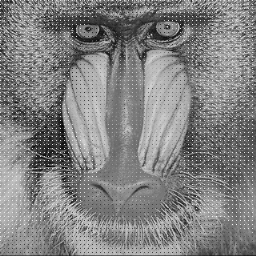

In [ ]:
from IPython.display import Image
Image('mono.png')

In [ ]:
import cv2

#hay que subir la imagen 'mono.png' si bien la original esta en formato .bmp, google colab no acepta bmp por eso la guardo en .png 
img = cv2.imread('mono.png')
height, width, channels = img.shape

In [ ]:
img.shape

(256, 256, 3)

####item a

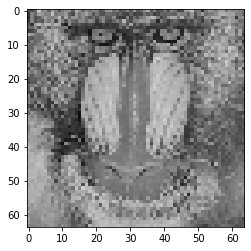

In [ ]:
item_a = np.zeros(shape = (64,64,3), dtype=int)
step = 4
x_pos = 1
y_pos = 1
for row in range(0, width, step):
  for col in range(0, height, step):
    new_pixel = img[row+x_pos, col+y_pos]
    item_a[row//step, col//step] = new_pixel

plt.imshow(item_a)

####item b

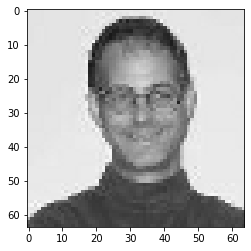

In [ ]:
item_b = np.zeros(shape = (64,64,3), dtype=int)
step = 4
x_pos = 0
y_pos = 0
for row in range(0, width, step):
  for col in range(0, height, step):
    new_pixel = img[row+x_pos, col+y_pos]
    item_b[row//step, col//step] = new_pixel

plt.imshow(item_b)

####item c

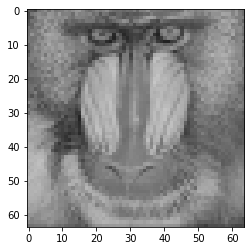

In [ ]:
item_c = np.zeros(shape = (64,64,3), dtype=int)
step = 4
for row in range(0, width, step):
  for col in range(0, height, step):
    new_pixel = np.mean(img[row:row+step, col:col+step])
    item_c[row//step, col//step] = new_pixel

plt.imshow(item_c)

#### item d

In [ ]:
import numpy as np

def FiniteDifference(prev,next,step):
  return ( (next-prev)/(2*step) )

def BilinealInterpolation(known_pixels, desired_pixel):
  #Arguments
  x_pixels = known_pixels[0]
  y_pixels = known_pixels[1]
  values = known_pixels[2]
  #Auxiliary terms
  delta_x = x_pixels[1] - x_pixels[0]
  delta_y = y_pixels[1] - y_pixels[0]
  scalar = 1./( delta_x * delta_y )
  x_vector = ( np.array([x_pixels[1]-desired_pixel[0], desired_pixel[0]-x_pixels[0]]) ).reshape((1,2))
  y_vector = ( np.array( [y_pixels[1]-desired_pixel[1], desired_pixel[1]-y_pixels[0]] ) ).reshape((2,1))
  #Computation
  result = np.zeros(shape=3,dtype=int)
  for i in range(0,3):
    first_mult = np.matmul(values[:,:,i], y_vector)
    result[i] = scalar * np.matmul(x_vector, first_mult) 
  return result

def BicubicInterpolation(values, desired_pixel):
  result = np.zeros(shape=3,dtype=int)

  #Estimate derivatives
  fy = np.zeros(shape=(2,2,3))
  fx = np.zeros(shape=(2,2,3))
  fxy = np.zeros(shape=(2,2,3))
  for i in range(0,2):
    for j in range(0,2):
      step =1
      #Partial derivative on Y
      prev_y = values[1+i,j]
      next_y = values[1+i,j+2]
      fy[i,j] = FiniteDifference(prev_y,next_y,step)
      #Partial derivative on X
      prev_x = values[i,1+j]
      next_x = values[i+2,1+j]
      fx[i,j] = FiniteDifference(prev_x,next_x,step)
      #Partial derivative XY
      prev_xy = values[i,j]
      next_xy = values[i+2,j+2]
      aux_sum = next_xy - next_x - next_y +(2*values[1+i,1+j]) - prev_x - prev_y + prev_xy
      fxy[i,j] = aux_sum / ( 2*step*step )

    #Calculate coefficients
    current_values = np.array([
                               values[1,1:3] ,
                               values[2,1:3]
                               ])
    aux_mat1 = np.concatenate((current_values,fy),axis=1)
    aux_mat2 = np.concatenate((fx,fxy),axis=1)
    f_matrix = np.concatenate((aux_mat1,aux_mat2), axis=0)
    const_mat1 = np.array([
        [1, 0, -3, 2],
        [0, 0, 3, -2],
        [0, 1, -2, 1],
        [0, 0, -1, 1]
    ])
    const_mat2 = np.array([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [-3, 3, -2, -1],
        [2, -2, 1, 1]
    ])
    for i in range(0,3):
      coef_mat = np.matmul(const_mat2, np.matmul(f_matrix[:,:,i],const_mat1))
      #Interpolate value
      x_val = desired_pixel[0]
      y_val = desired_pixel[1]
      x_vector = np.array([1, x_val, x_val**2, x_val**3])
      y_vector = np.array([1, y_val, y_val**2, y_val**3]).reshape(-1,1)
      result[i] = np.matmul(x_vector, np.matmul(coef_mat,y_vector))
    return result

  


In [ ]:
def GetValue(array,row, column):
  if (row<0) or (column<0)or(row>63)or(column>63):
    return 0
  else:
    return array[row,column]
def InterpolateImg(original_img, interp_func):
  resized_image = np.zeros(shape=(256,256,3),dtype=int)
  original_pixels = np.linspace(start=0,stop=256,num=64,endpoint=False,dtype=int,)
  for x_pixel in range(0,256):
    if ( x_pixel in original_pixels ):
      x_pixels = [x_pixel, x_pixel+4]
      x_indx = int(x_pixel/4)
    for y_pixel in range(0,256):
      if ( y_pixel in original_pixels ):
        y_pixels = [y_pixel, y_pixel+4]
        y_indx = int(y_pixel/4)
      if  ( x_pixel in original_pixels ) and ( y_pixel in original_pixels ) : #No se interpolan
        resized_image[x_pixel, y_pixel] = original_img[x_indx,y_indx]
      else: #Hace falta interpolar
        if interp_func == "Bilineal":
          if( (x_indx<63)and(y_indx<63) ):
            values = (np.array([ original_img[x_indx,y_indx], original_img[x_indx,y_indx+1]
                              ,original_img[x_indx+1,y_indx], original_img[x_indx+1,y_indx+1] ]) ).reshape((2,2,3))
          known_pixels = (x_pixels, y_pixels, values)
          resized_image[x_pixel, y_pixel] = BilinealInterpolation(known_pixels, [x_pixel, y_pixel])
        elif interp_func == "Bicubic": 
          values = np.zeros(shape=(4,4,3))
          for i in range(0,4):
            for j in range(0,4):
              values[i,j] = GetValue(original_img,x_indx+i-1, y_indx+j-1)
          resized_image[x_pixel, y_pixel] = BicubicInterpolation(values, [(x_pixel-4.*x_indx)/4., (y_pixel-4.*y_indx)/4.])
  return resized_image

#####Interpolacion bilineal

In [ ]:
item_a_resized_lineal = InterpolateImg(item_a,"Bilineal")
item_b_resized_lineal = InterpolateImg(item_b,"Bilineal")
item_c_resized_lineal = InterpolateImg(item_c,"Bilineal")

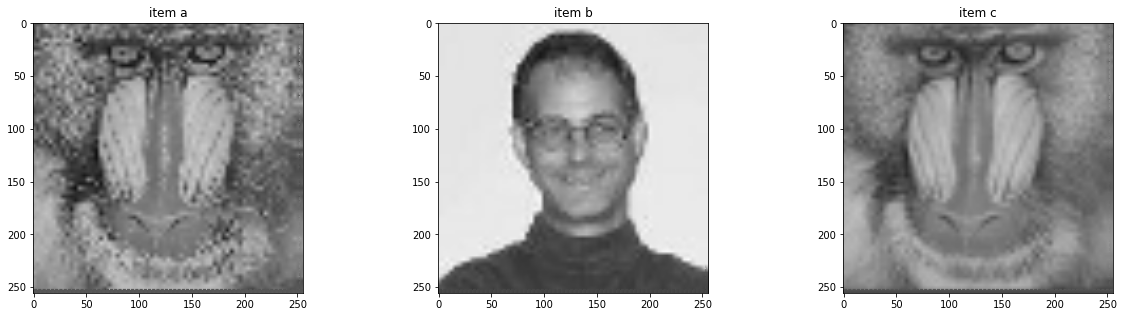

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0.5)
fig.add_subplot(1,3, 1)
plt.title("item a")
plt.imshow(item_a_resized_lineal)

fig.add_subplot(1,3, 2)
plt.title("item b")
plt.imshow(item_b_resized_lineal)

fig.add_subplot(1,3, 3)
plt.title("item c")
plt.imshow(item_c_resized_lineal)

#####Interpolacion bicubica



In [ ]:
item_a_resized_bicubic = InterpolateImg(item_a,"Bicubic")
item_b_resized_bicubic = InterpolateImg(item_b,"Bicubic")
item_c_resized_bicubic = InterpolateImg(item_c,"Bicubic")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


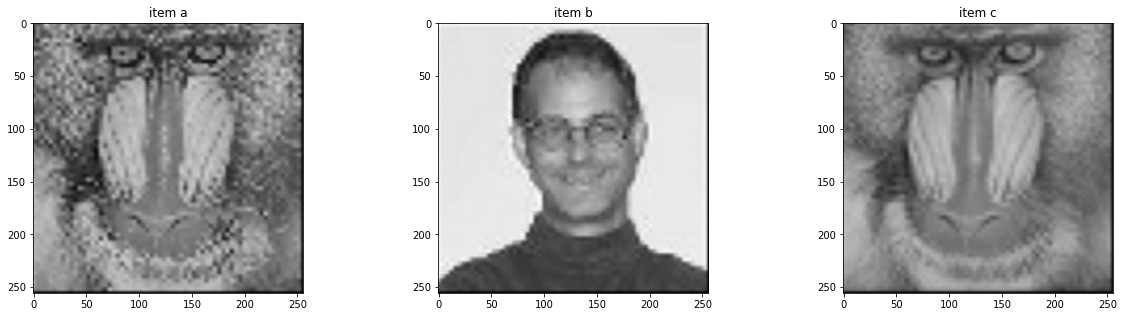

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0.5)
fig.add_subplot(1,3, 1)
plt.title("item a")
plt.imshow(item_a_resized_bicubic)

fig.add_subplot(1,3, 2)
plt.title("item b")
plt.imshow(item_b_resized_bicubic)

fig.add_subplot(1,3, 3)
plt.title("item c")
plt.imshow(item_c_resized_bicubic)

#####Espectro de la imagen original

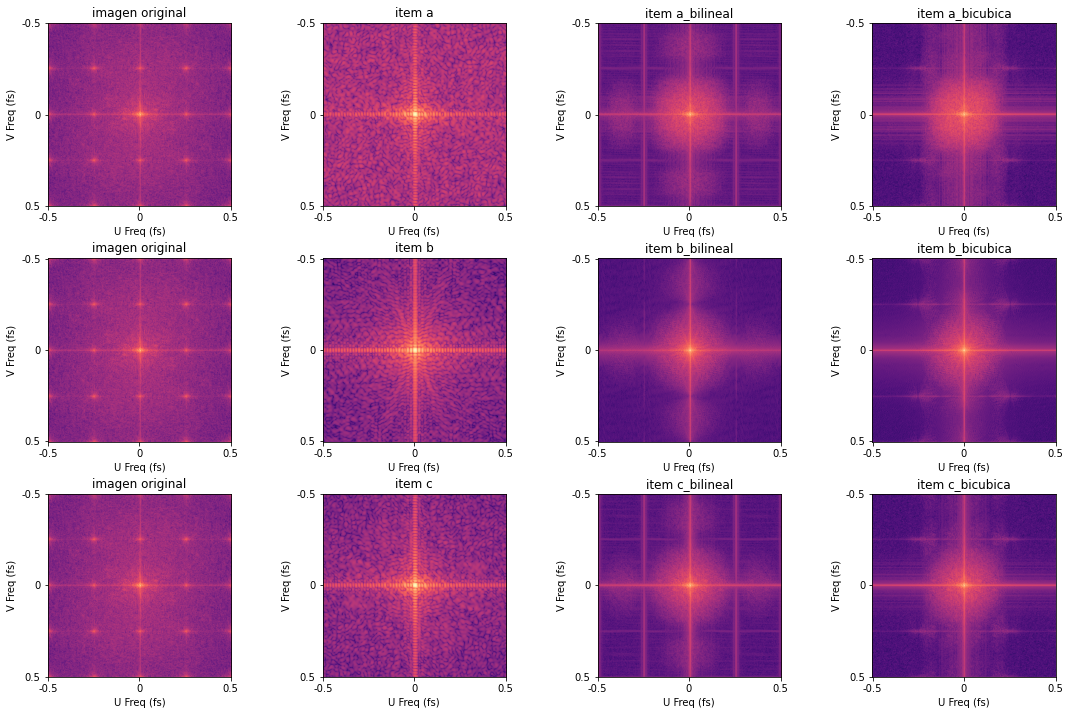

In [ ]:
def CalcCentredSpectrum(img, const=20):
  img_spectrum = np.fft.fft2(img,s=[512,512])
  img_mag_dB = const*np.log10(np.ones(len(img_spectrum))+abs(img_spectrum ))
  return np.fft.fftshift(img_mag_dB)

def DrawPlot(pos, data, title,nrows=3, ncols=4, color = "magma"):
  plt.subplot(nrows, ncols, pos)
  plt.imshow(data,cmap= color)
  plt.title(title)
  plt.xticks([0,255,511],[-0.5,0,0.5])
  plt.yticks([0,255,511],[-0.5,0,0.5])
  plt.xlabel("U Freq (fs)")
  plt.ylabel("V Freq (fs)")

#Espectro imagen original
mag_dB_shifted = CalcCentredSpectrum(img[:,:,0])

#Espectro imagen reducida item a
item_a_mag_dB_shifted = CalcCentredSpectrum(item_a[:,:,0])
#Espectro bilineal del item a
item_a_lineal_mag_dB_shifted = CalcCentredSpectrum(item_a_resized_lineal[:,:,0])
#Espectro bicubica del item a
item_a_bicubic_mag_dB_shifted = CalcCentredSpectrum(item_a_resized_bicubic[:,:,0])

#Espectro imagen reducida item b
item_b_mag_dB_shifted = CalcCentredSpectrum(item_b[:,:,0])
#Espectro bilineal del item b
item_b_lineal_mag_dB_shifted = CalcCentredSpectrum(item_b_resized_lineal[:,:,0])
#Espectro bicubica del item b
item_b_bicubic_mag_dB_shifted = CalcCentredSpectrum(item_b_resized_bicubic[:,:,0])

#Espectro imagen reducida item b
item_c_mag_dB_shifted = CalcCentredSpectrum(item_c[:,:,0])
#Espectro bilineal del item b
item_c_lineal_mag_dB_shifted = CalcCentredSpectrum(item_c_resized_lineal[:,:,0])
#Espectro bicubica del item b
item_c_bicubic_mag_dB_shifted = CalcCentredSpectrum(item_c_resized_bicubic[:,:,0])

############################################
#                 GRAFICAS                 #
############################################

plt.figure(figsize=(14,14))
plt.subplots_adjust(top = 1, bottom = 0.3, right = 1, left = 0, hspace = 0, wspace = 0.5)

#Original
DrawPlot(pos=1, data=mag_dB_shifted, title="imagen original")
#Item a
DrawPlot(pos=2, data=item_a_mag_dB_shifted, title="item a")
#Item a bilineal
DrawPlot(pos=3, data=item_a_lineal_mag_dB_shifted, title="item a_bilineal")
#Item a bicubica
DrawPlot(pos=4, data=item_a_bicubic_mag_dB_shifted, title="item a_bicubica")

#Original
DrawPlot(pos=5, data=mag_dB_shifted, title="imagen original")
#Item a
DrawPlot(pos=6, data=item_b_mag_dB_shifted, title="item b")
#Item a bilineal
DrawPlot(pos=7, data=item_b_lineal_mag_dB_shifted, title="item b_bilineal")
#Item a bicubica
DrawPlot(pos=8, data=item_b_bicubic_mag_dB_shifted, title="item b_bicubica")

#Original
DrawPlot(pos=9, data=mag_dB_shifted, title="imagen original")
#Item a
DrawPlot(pos=10, data=item_c_mag_dB_shifted, title="item c")
#Item a bilineal
DrawPlot(pos=11, data=item_c_lineal_mag_dB_shifted, title="item c_bilineal")
#Item a bicubica
DrawPlot(pos=12, data=item_c_bicubic_mag_dB_shifted, title="item c_bicubica")

plt.show()

Viendo la segunda columna de los espectros graficados se puede notar como al reducir el tamaño de la imagen de 256x256 a 64x64 desaparecen los maximos locales que se veian fuera de los ejes horizontales y verticales.Asimismo, se puede notar que las lineas horizontales y verticales que se veian en la primera columna en realidad estan compuestas por una repeticion de maximos rectangulares.

Esto se debe a que el hecho de hacer downsampling equivale a bajar la frecuencia de muestreo (en este caso se obtiene una frecuencia de muestreo en ambas direcciones 4 veces menor), por lo que los espectros que se ven en la segunda columna corresponderian unicamente a la parte central de los espectros que se observan en la primera columna,por eso el maximo central se ve mas grande en los espectros de la segunda columna.
Esto tambien explica porque se pierde informacion del espectro al volver a escalar la imagen a su tamano original mediante una interpolacion. Los componentes de frecuencia mas altos se pierden cuando se realizo el downsampling, y tambien se genera aliasing en la imagen al no filtrar la imagen antes del downsampling.

Finalmente, en la tercera y cuarta columna se ven los resultados de realizar la interpolacion para volver al tamaño original. El espectro se recupera bien para los valores bajos de frecuencia (el cuadrado difuso qu epuede verse en el centro de la imagen).Sin embargo se puede ver que para frecuencias mas altas el espectro obtenido difiere de manera mas notable con el de la imagen original.